In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils

In [1]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

NameError: name 'keras' is not defined

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

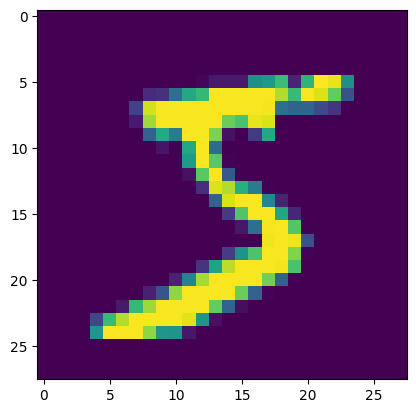

In [6]:
plt.imshow(x_train[0])

In [7]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

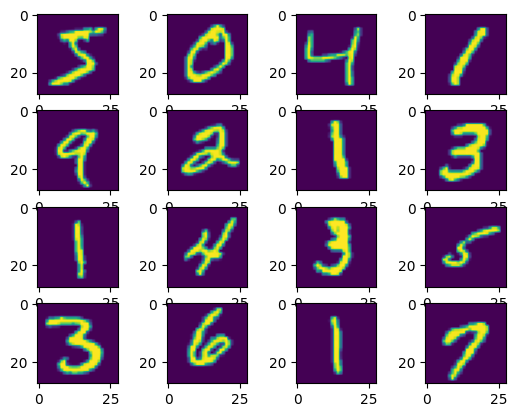

In [8]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [9]:
input_shape = (28, 28, 1)

In [10]:
model_1 = keras.Sequential([
    keras.Input(shape=input_shape),
    Flatten(),
    Dense(50),
    Dense(1)
    ])

In [11]:
"""Функция потерь - это метрика для коррекции весов, а другие метрики используются для оценки качества модели"""

model_1.compile(optimizer="adam", # можновыбрать и SGD
                loss="categorical_crossentropy", # функция потерь
                metrics=["accuracy"]) # метрика оценки результата

In [39]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


d:\GitTest\Введение в нейронные сети\Introduction-to-HC\.venv\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1127
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1127
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1127
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1127
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1127
CPU times: total: 29.3 s
Wall time: 19.9 s


In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [25]:
model_2 = keras.Sequential([
    keras.Input(shape=input_shape),
    Flatten(),
    Dense(50, activation= 'relu'),
    Dense(10, activation= 'softmax')])

In [26]:
model_2.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [31]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0131 - accuracy: 0.9962
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0117 - accuracy: 0.9964
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0110 - accuracy: 0.9966
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - accuracy: 0.9969
CPU times: total: 30.7 s
Wall time: 20.3 s


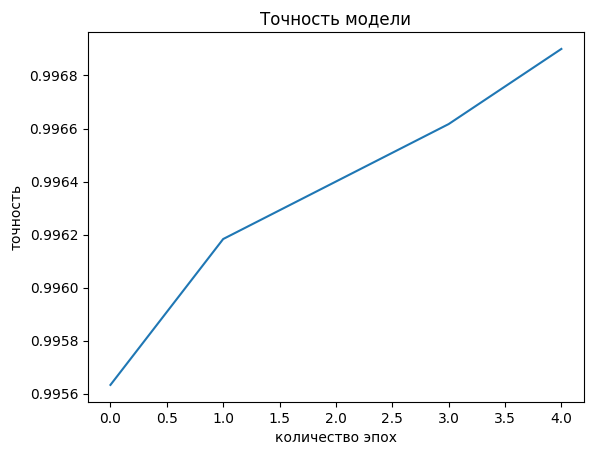

In [35]:
plt.plot(history.history["accuracy"])
plt.title("Точность модели")
plt.ylabel("точность")
plt.xlabel("количество эпох")
plt.show()

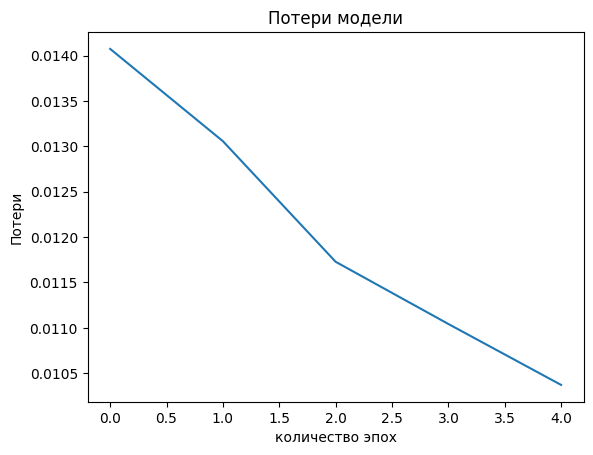

In [36]:
plt.plot(history.history["loss"])
plt.title("Потери модели")
plt.ylabel("Потери")
plt.xlabel("количество эпох")
plt.show()

In [38]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1244 - accuracy: 0.9734


[0.12439519166946411, 0.9733999967575073]

In [41]:
%%time
history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data=(x_test, y_test_cat))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.1426 - val_accuracy: 0.9747
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.1418 - val_accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.1543 - val_accuracy: 0.9714
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.1550 - val_accuracy: 0.9715
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.1454 - val_accuracy: 0.9735
CPU times: total: 33.6 s
Wall time: 22.3 s


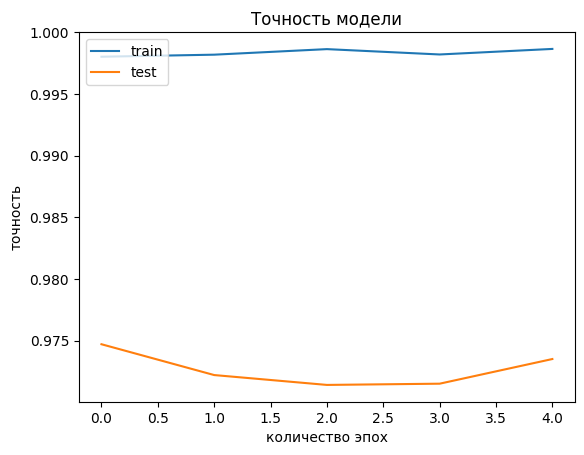

In [42]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Точность модели")
plt.ylabel("точность")
plt.xlabel("количество эпох")
plt.legend(["train", "test"], loc="upper left")
plt.show()

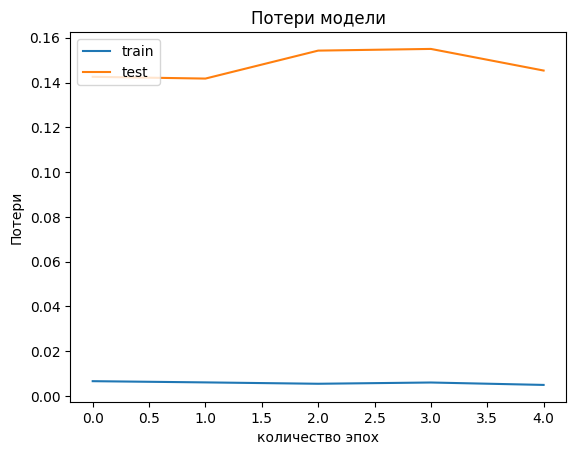

In [43]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Потери модели")
plt.ylabel("Потери")
plt.xlabel("количество эпох")
plt.legend(["train", "test"], loc="upper left")
plt.show()

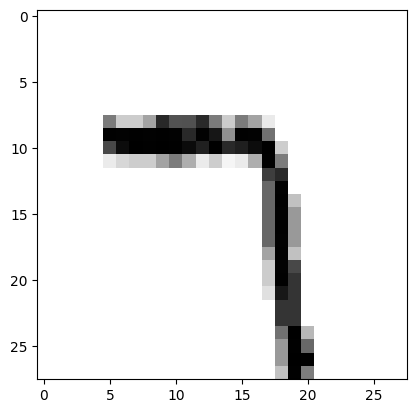

1/1 [==============================] - 0s 32ms/step
Цифра: 7


In [51]:
n_rec = 5999
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])
print("Цифра:", prediction)